In [2]:
import pandas as pd
df= pd.read_csv('./IMDB-Dataset.csv')
#Removeduplicaterows
df=df.drop_duplicates()

In [3]:
import re
import string
import nltk
nltk.download ('stopwords')
nltk.download ('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
stop = set( stopwords.words ('english'))
# Expanding contractions
def expand_contractions ( text ) :
    return contractions . fix( text )
# Function to clean data
def preprocess_text ( text ) :
    wl = WordNetLemmatizer ()
    soup = BeautifulSoup(text , "html.parser") # Removing html tags
    text = soup . get_text ()
    text = expand_contractions ( text ) # Expanding chatwords and contracts clearing
    contractions
    emoji_clean = re. compile ("["
                            u"\U0001F600-\U0001F64F"#emoticons
                            u"\U0001F300-\U0001F5FF"#symbols&pictographs
                            u"\U0001F680-\U0001F6FF"#transport&mapsymbols
                            u"\U0001F1E0-\U0001F1FF"#flags(iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+",flags=re.UNICODE)
    text = emoji_clean . sub(r'',text )
    text = re.sub (r'\.(?=\ S)', '. ',text ) #add space after full stop
    text = re.sub (r'http \S+', '', text ) # remove urls
    text = "". join ([
    word . lower () for word in text if word not in string . punctuation
    ]) # remove punctuation and make text lowercase
    text = " ". join ([
                    wl. lemmatize ( word ) for word in text . split () if word not in stop and word .
                    isalpha () ]) # lemmatize
    return text
df['review'] = df['review'].apply(preprocess_text )


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duphong.hua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duphong.hua\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\duphong.hua\AppData\Local\Temp\ipykernel_8084\1957807011.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text , "html.parser") # Removing html tags


In [4]:
# # Tạo TfidfVectorizer để xây dựng từ điển
# vectorizer = TfidfVectorizer(max_features=1000000)

# # Áp dụng vectorizer vào dữ liệu đã tiền xử lý
# X = vectorizer.fit_transform(df['review'])

# # In ra kích thước của từ điển
# print("Kích thước từ điển:", len(vectorizer.get_feature_names_out()))

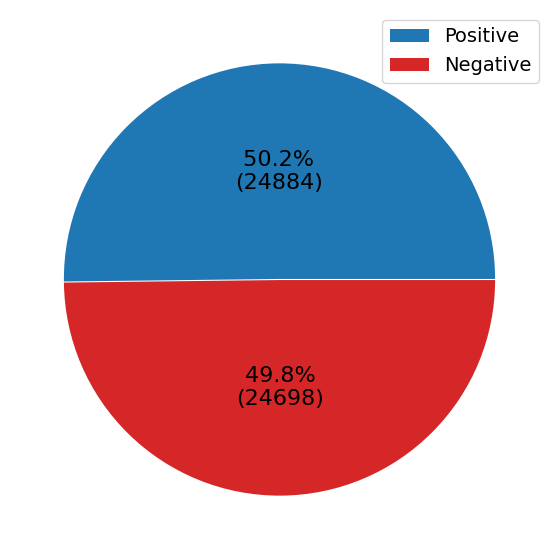

In [5]:
import numpy as np
import seaborn as sns
import matplotlib . pyplot as plt
# Creating autocpt arguments
def func (pct , allvalues ) :
    absolute = int( pct / 100.* np. sum( allvalues ) )
    return " {:.1f}% \n({:d})". format (pct , absolute )

freq_pos = len(df[df['sentiment'] == 'positive'])

freq_neg = len(df[df['sentiment'] == 'negative'])
data = [ freq_pos , freq_neg ]
labels = ['positive', 'negative']
# Create pie chart
pie , ax = plt.subplots ( figsize =[11 ,7])
plt.pie(x=data , autopct = lambda pct: func (pct , data ) , explode =[0.0025]*2 ,
            pctdistance =0.5 , colors =[sns.color_palette()[0] , 'tab:red'] , textprops ={'fontsize': 16})
# plt . title ( ' Frequencies of sentiment labels ', fontsize =14 , fontweight = ' bold ')
labels = [r'Positive', r'Negative']
plt.legend (labels , loc ="best", prop ={ 'size': 14})
pie.savefig ("PieChart.png")
plt.show ()


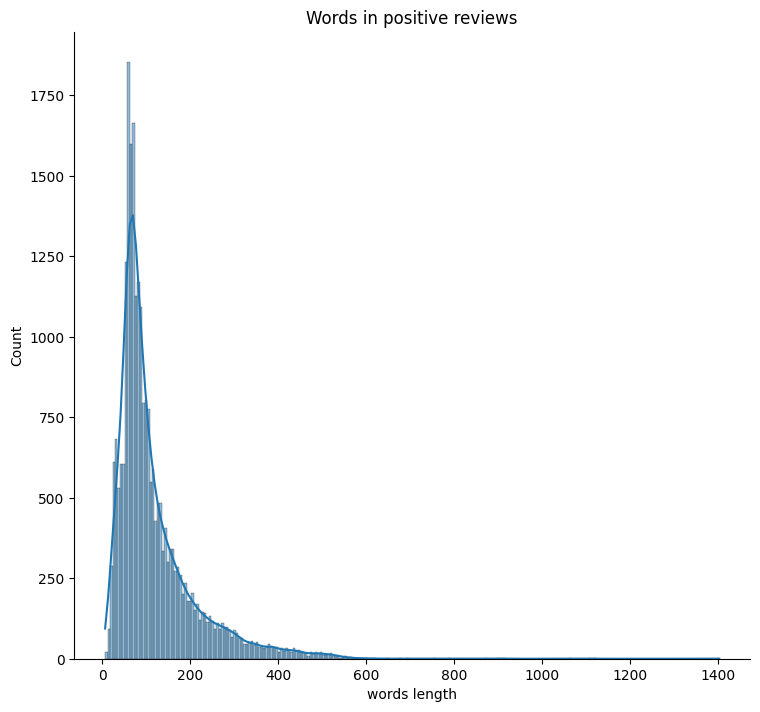

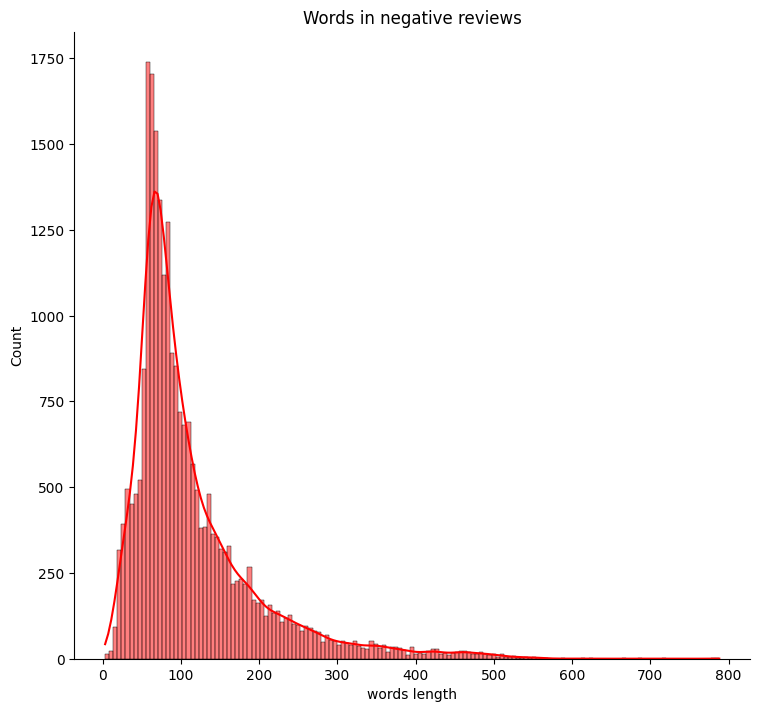

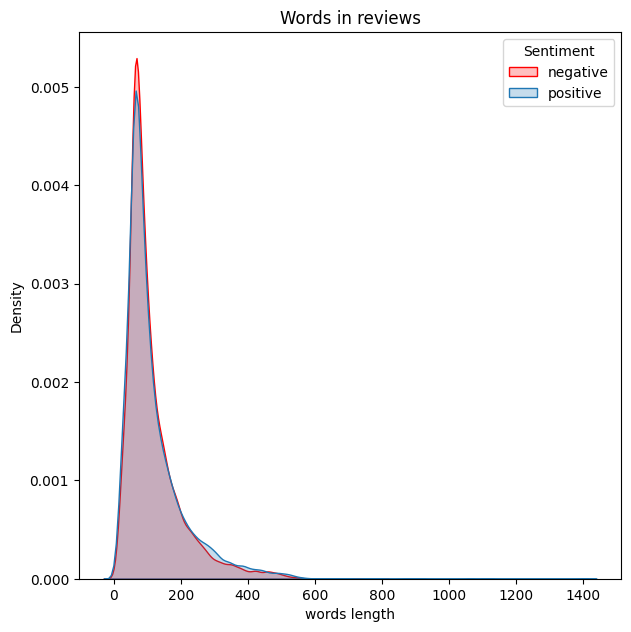

In [6]:
words_len = df['review'].str.split().map( lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len
hist_positive = sns.displot(
data = df_temp[df_temp['sentiment'] == 'positive'],x="words length", hue="sentiment", kde=True , height =7 , aspect =1.1 , legend = False).set(title ='Words in positive reviews')
plt . show (hist_positive)
hist_negative = sns.displot(data = df_temp [df_temp ['sentiment'] == 'negative'],x="words length", hue="sentiment", kde=True , height =7 , aspect =1.1 , legend =False , palette =['red']).set( title ='Words in negative reviews')
plt.show (hist_negative)
plt.figure( figsize =(7 ,7.1) )
kernel_distibution_number_words_plot = sns.kdeplot(data = df_temp , x="words length", hue="sentiment", fill =True , palette =[sns.color_palette () [0] , 'red']).set( title ='Words in reviews')

plt.legend ( title ='Sentiment', labels =[ 'negative', 'positive'])
plt.show ( kernel_distibution_number_words_plot )

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction . text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder ()
x_data = df['review']
y_data = label_encode.fit_transform(df['sentiment'])
x_train , x_test , y_train , y_test = train_test_split (
x_data , y_data , test_size =0.2 , random_state =42)

In [8]:
x_data

0        one reviewer mentioned watching oz episode hoo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 49582, dtype: object

In [9]:
tfidf_vectorizer = TfidfVectorizer ( max_features =10000)
tfidf_vectorizer.fit( x_train , y_train )
x_train_encoded = tfidf_vectorizer.transform( x_train )
x_test_encoded = tfidf_vectorizer.transform( x_test )


In [10]:
from sklearn . tree import DecisionTreeClassifier
from sklearn . ensemble import RandomForestClassifier
from sklearn . metrics import accuracy_score
dt_classifier = DecisionTreeClassifier (
criterion ='entropy',
random_state =42)
dt_classifier . fit( x_train_encoded , y_train )
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score (y_pred , y_test )

0.715942321266512

In [11]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
rf_classifier = RandomForestClassifier (random_state =42)
rf_classifier.fit( x_train_encoded , y_train )
y_pred = rf_classifier.predict ( x_test_encoded)
accuracy_score (y_pred , y_test )
# y_pred

0.8381567006151054

In [13]:
# rf_classifier.predict(11.1)